集群中心的座標： [[2.1 2.1]
 [1.1 1.1]]
預測： [1 1 1 0 0 0]
實際： [1, 1, 1, 0, 0, 0]
預測[1, 1],[2.3,2.1]： [1 0]


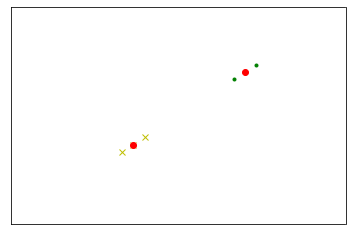

In [2]:
import numpy as np

from sklearn.model_selection import train_test_split #匯入K-means函式庫
from sklearn.cluster import KMeans
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics

X= np.array([[1,1],[1.1,1.1],[1.2,1.2],
             [2,2],[2.1,2.1],[2.2,2.2]])
y=[1,1,1,
  0,0,0]

kmeans = KMeans(n_clusters=2, random_state=0).fit(X) #KMeans演算法 指定2類資料
print("集群中心的座標：",kmeans.cluster_centers_) #取得集群中心的座標
print("預測：",kmeans.predict(X)) #預測
print("實際：",y) #真實答案
print("預測[1, 1],[2.3,2.1]：",kmeans.predict([[1, 1],[2.3,2.1]])) #預測資料

plt.axis([0, 3, 0, 3]) #用圖片顯示
plt.plot(X[:3,0], X[:3,1], 'yx') #黃色點
plt.plot(X[3:,0], X[3:,1], 'g.') #綠色點
plt.plot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 'ro') #顯示中心點
plt.xticks(())
plt.yticks(())
plt.show()

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics

#取得鳶尾花的資料
iris = datasets.load_iris()

#拆分資料 80:20，訓練與測試用2類標籤答案
iris_X_train , iris_X_test , iris_y_train , iris_y_test = train_test_split(iris.data,iris.target,test_size=0.2)

#KMeans演算法2類標籤答案
kmeans = KMeans(n_clusters = 3)
kmeans_fit =kmeans.fit(iris_X_train) #訓練，沒有標籤答案
#調整標籤的數字
iris_y_train[iris_y_train==1]=11
iris_y_train[iris_y_train==0]=1
iris_y_train[iris_y_train==11]=0
print("調整",iris_y_train) #顯示調整後的預測

score = metrics.accuracy_score(iris_y_train,kmeans.predict(iris_X_train))
print('準確率:{0:f}'.format(score)) #顯示準確率

調整 [1 2 1 0 0 0 2 2 0 1 2 1 1 0 2 1 1 1 1 1 2 1 0 0 0 1 1 2 1 0 0 2 2 0 1 1 1
 2 1 2 1 0 0 1 2 1 2 2 0 0 0 0 0 2 0 1 0 2 0 2 2 0 0 2 2 2 1 1 1 2 1 1 2 1
 0 2 2 2 2 1 0 0 2 1 0 0 2 1 0 0 2 0 0 1 1 2 0 1 0 2 1 1 2 1 2 2 1 0 1 2 2
 1 2 1 1 0 1 2 2 2]
準確率:0.883333


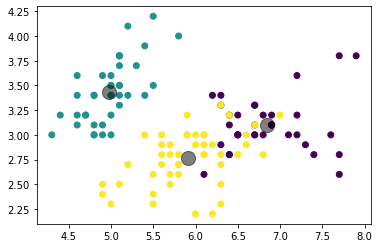

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics

#Load the diabetes dataset
iris = datasets.load_iris()

iris_X_train , iris_X_test , iris_y_train , iris_y_test = train_test_split(iris.data,iris.target,test_size=0.2)

#KMeans演算法
kmeans = KMeans(n_clusters = 3)
kmeans.fit(iris_X_train)
y_predict=kmeans.predict(iris_X_train)


x1=iris_X_train[:, 0] #鳶尾花花萼長度
y1=iris_X_train[:, 1] #鳶尾花花萼寬度
plt.scatter(x1,y1, c=y_predict, cmap='viridis') #畫每一筆的位置

centers = kmeans.cluster_centers_ #每個分類的中心點
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5); #畫出中心點
plt.show() #顯示圖片

Automatically created module for IPython interactive environment


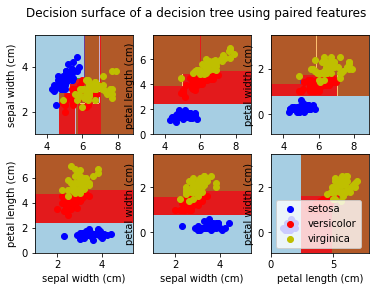

In [9]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):

    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target
    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))


    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) #np.c_ 串接兩個list,np.ravel將矩陣變為一維

    Z = Z.reshape(xx.shape)


    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")


    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

這邊選擇使用Decision Tree作比較。
K-Means：
可以非常快速地完成分群任務，但是如果觀測值具有雜訊（Noise）或者極端值，其分群結果容易被這些雜訊與極端值影響，適合處理分布集中的大型樣本資料。
把n個點（可以是樣本的一次觀察或一個實例）劃分到k個聚類中，使得每個點都屬於離他最近的均值（此即聚類中心）對應的聚類，以之作為聚類的標準。這個問題將歸結為一個把資料空間劃分為Voronoi cells的問題。

Decision Tree：
可以同時處理連續型與類別型變數。
選擇分類效果最好的分界線，將數據分兩份。兩份數據分頭遞迴下去，直到不同類別的數據都被分開為止。
每次選擇分界線時，窮舉各種分界線走向（窮舉每個維度），窮舉各種分界線位置（窮舉每筆數據），從中找到分類效果最好者。
分界線兩側的數據，分頭計算混亂程度。兩個混亂程度，求加權平均數（權重是數據數量），做為分類效果。數值越低，效果越好。